<a href="https://colab.research.google.com/github/NeuroLuke/ModuleComputationalNeuroscience2024/blob/main/LK_SpatialCells_20240506.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NOTE:** Please first make a copy of this tutorial, and then use your copy for running and making any changes.

# **Simulation and analysis of spatial cells**

### **Overview**

The goal of this tutorial is to give you an example of how one can simulate and analyze the activity of spatial cells including place cells and head-direction cells. Here is a complete pipeline that does the following:
1. Simulate a subject's navigation path through a 2D environment.
2. Simulate the activity of a place cell.
3. Analyze this place cell.
4. Simulate and analyze a head-direction cell.

If you have difficulties writing the code on your own, refer to section 5 to get a walk-through of Steps 1 and 2.


## **Setting up the Python environment**

### Import necessary packages

One of the main advantages of Python is that it is easily modified and extended to new use cases. A primary consequence of this is **packages**. Here, packages refer to open-sourced libraries of code that have been developed for specific purposes, like statistical analysis, plotting, or machine learning. They are not built-in to Python itself, but must be **imported** into your script in order to use them.

In this notebook, we will primarily use three packages, **numpy**, **pandas** and **matplotlib**. These packages give you a large range of new functions and methods to work with and make it a lot easier to work with scientific data!

If you are ever curious about a package's function or need to know how to use it, you can find this info in the package **documentation**.

In [ ]:
# let's import some useful packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## **Section 1: Simulate the animal's path through the environment**

In studies investigating place cells and head-direction cells, the animal typically moves through a two-dimensional environment. Since this is a simulation study, we also need to simulate the animal's trajectory through space.

Please complete the following two tasks:
1. Write some code to simulate the path of the animal in 2D space.
2. Plot the animal's navigation path.

In [ ]:
# code for simulating the path

In [ ]:
# code for plotting the simulated path

## **Section 2: Simulate a place cell**

A place cell is a cell that fires its action potentials whenever the animal is in a particular part of the two-dimensional environment.

Please complete the following two tasks:
1. Write some code to simulate the activity of such a cell over time.
2. Plot the cell's activity as a function of two-dimensional position.



In [ ]:
# code for simulating the activity of the place cell

In [ ]:
# code for plotting the simualted place cell

## **Section 3: Analyze the place cell**

To identify whether the activity profile of a cell is that of a place cell, place-cell studies often compute the spatial information content of the cell.

Please complete the following three tasks:
1. Learn how to estimate a cell's spatial information content. To this end, you can look at this paper: Souza et al., Neuroscience, 2018.
2. Estimate the cell's spatial information content.
3. Test whether the cell's spatial information content is significant in comparison to surrogate spatial information content obtained through circularly shifting the firing rates.

In [ ]:
# code for analyzing the place cell

## **Section 4: Simulation and analysis of a head-direction cell**

Now that you're done with the place-cell part, do the same for a head-direction cell.

Please complete the following parts:
1. Simulate a head-direction cell.
2. Analyze the head-direction cell using the mean resultant vector length of its directional tuning curve.

In [ ]:
# code for simulating and analyzing a head-direction cell

## **Section 5: helper code**

If you have problems writing the code on your own, you can use the code below as an inspiration.

Let's start with defining some parameters. It's useful to declare all parameters at the beginning of a script so that they are easily visible when starting the analysis.

In [ ]:
# settings for the environment
environment = {}
environment['edge_length'] = 200
environment['limits_x'] = [-100, 100]
environment['limits_y'] = [-100, 100]

# settings for the analysis
analysis = {}
analysis['x_bin_width'] = 20
analysis['y_bin_width'] = 20
analysis['x_bin_edges'] = np.linspace(np.min(environment['limits_x']), np.max(environment['limits_x']), int(environment['edge_length'] / analysis['x_bin_width'] + 1))
analysis['x_bin_centers'] = np.convolve(analysis['x_bin_edges'], np.ones(2) / 2, mode = 'valid')
analysis['y_bin_edges'] = np.linspace(np.min(environment['limits_y']), np.max(environment['limits_y']), int(environment['edge_length'] / analysis['y_bin_width'] + 1))
analysis['y_bin_centers'] = np.convolve(analysis['y_bin_edges'], np.ones(2) / 2, mode = 'valid')

# settings for the place cell we want to simulate
place_cell_properties = {}
place_cell_properties['pf_x'] = 5
place_cell_properties['pf_y'] = 10
place_cell_properties['pf_radius'] = 20
place_cell_properties['neural_noise'] = 0

# settings for plotting
plotting = {}
plotting['cm'] = 1 / 2.54

Let's define a function for creating a navigation path through a 2D environment. The output comprises time stamps, the subject's x-coordinate in the environment, the subject's y-coordinate in the environment, and the subject's heading direction (in radians).

In [ ]:
# function: create random-walk trajectory
def simulate_random_walk(time_step: float, duration: int, speed: float, initial_direction: float, tortuosity: float,
         environment_radius: float, environment_is_square: bool):
    """
    Simulates a random walk trajectory.

    Arguments:
        time_step (float): time step in seconds
        duration (int): total duration in seconds
        speed (float): speed of the agent in centimeters per second
        initial_direction (float): initial direction in radians
        tortuosity (float): tortuosity of the trajectory
        environment_radius (float): half the environment size
        environment_is_square (bool): whether the environment is a square

    Returns: dataframe "beh" including
        t:              times
        subj_x:         subject's x coordinates
        subj_y:         subject's y coordinates
        subj_allo_dir:  subject's allocentric movement directions
    """

    # preallocate time
    t = np.round(np.arange(0, duration + time_step, time_step), 3)
    print(f"Simulating a random walk. Start time: {min(t):.1f}. End time: {max(t):.1f}.")

    # preallocate trajectory
    subj_x, subj_y, subj_allo_dir = np.zeros((3, len(t)))

    # initial movement direction
    if initial_direction is None:
        current_direction = np.random.uniform(-np.pi, np.pi) # random first walking direction
    else:
        current_direction = initial_direction

    # sample trajectory
    for i_time in range(len(t) - 1):

        # produce this movement step
        is_within_environment = False
        tmp_tortuosity = tortuosity # start with the pre-defined tortuosity
        tmp_count = 0
        while not is_within_environment:

            # new movement direction
            next_direction = current_direction + tmp_tortuosity * np.sqrt(time_step) * np.random.randn()
            dx = np.cos(next_direction) * speed * time_step
            dy = np.sin(next_direction) * speed * time_step

            # next subject position
            next_subj_x = subj_x[i_time] + dx
            next_subj_y = subj_y[i_time] + dy

            # check whether next position is within the environment
            if environment_is_square == True:
                if (np.abs(next_subj_x) > environment_radius) or (np.abs(next_subj_y) > environment_radius):
                    is_within_environment = False
                else:
                    is_within_environment = True

            # increase tortuosity after a while
            tmp_count += 1
            if tmp_count == 50:
                tmp_tortuosity = tmp_tortuosity * 1.25 # increase the tortuosity
                tmp_count = 0

        # calculate new position
        subj_x[i_time + 1] = next_subj_x
        subj_y[i_time + 1] = next_subj_y

        # allocentric movement direction
        current_direction = np.arctan2(dy, dx)
        subj_allo_dir[i_time + 1] = current_direction

    # output
    beh = pd.DataFrame(
        {'t': t,
         'subj_x': subj_x,
         'subj_y': subj_y,
         'subj_allo_dir': subj_allo_dir,
        })

    return beh

Now we can use the previously defined function "simulate_random_walk" to create the animal's navigation trajectory through space.

In [ ]:
# simulate navigation trajectory
beh = simulate_random_walk(time_step = 0.1, duration = 1800, speed = 10, initial_direction = 0, tortuosity = 0.5, environment_radius = 100, environment_is_square = True)

Simulating a random walk. Start time: 0.0. End time: 1800.0.


Let's also create a function for plotting the navigation path. Nice plots often require quite some code.

In [ ]:
# function for plotting the navigation path
def plot_navigation_path(beh, environment, analysis, plotting):
    """
    This function creates a figure to show the navigation path.

    Arguments:
        beh: behavioral data
        environment: settings for the environment
        analysis: settings for the analysis
        plotting: settings for plotting
    """

    # main plot
    fig = plt.figure(facecolor = "white", figsize = (8 * plotting['cm'], 8 * plotting['cm']))
    main_ax = fig.add_axes([0.225, 0.25, 0.5, 0.5])
    extent = [np.min(analysis['x_bin_edges']), np.max(analysis['x_bin_edges']), np.min(analysis['y_bin_edges']), np.max(analysis['y_bin_edges'])]
    navi = main_ax.scatter(beh.subj_x, beh.subj_y, c = beh.subj_allo_dir, vmin = -np.pi, vmax = np.pi, cmap = 'twilight', s = 0.5) # navigation path
    main_ax.set_title('Path', fontsize = 12, pad = 5)
    main_ax.set_xlabel('x', labelpad = -8, fontsize = 12)
    main_ax.set_ylabel('y', labelpad = -30, fontsize = 12, rotation = 0, va = 'center')
    main_ax.set_xlim([min(environment['limits_x']), max(environment['limits_x'])])
    main_ax.set_ylim([min(environment['limits_y']), max(environment['limits_y'])])
    main_ax.set_xticks(np.linspace(min(environment['limits_x']), max(environment['limits_x']), 2))
    main_ax.set_yticks(np.linspace(min(environment['limits_y']), max(environment['limits_y']), 2))
    main_ax.tick_params(axis = 'both', labelsize = 12)
    # colorbar for allocentric heading direction
    cb_ax = fig.add_axes([0.75, 0.3, 0.025, 0.4])
    cb_ax.axis('off')
    cb = fig.colorbar(navi, ax = cb_ax, fraction = 1)
    cb.set_label('Allocentric direction', rotation = 270, labelpad = 15, fontsize = 12)
    cb.set_ticks(np.linspace(-np.pi, np.pi, 5))
    cb.set_ticklabels(np.linspace(-180, 180, 5).astype(int), fontsize = 12)
    # save figure
    plt.show()

Cool, let's use the previously defined function to plot the subject's navigation path.

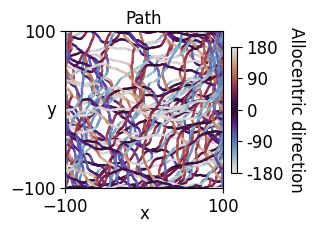

In [ ]:
# plot the navigation path
plot_navigation_path(beh, environment, analysis, plotting)

Excellent! Let's define a function for simulating place-cell activity.

In [ ]:
def simulate_allocentric_place_cell_activity(beh, pf_x: float, pf_y: float, pf_radius: float, neural_noise: float):
    """
    Simulates place cell activity.
    It uses a Gaussian kernel to simulate the place cell activity.

    Arguments:
        beh (dataframe): behavioral information
        pf_x (float): x-position of the place field
        pf_y (float): y-position of the place field
        pf_radius (float): standard deviation of the Gaussian function
        neural_noise (float): neural noise

    Returns: dataframe "beh_neural" with
        t: time
        subj_x: subject's x-locations
        subj_y: subject's y-locations
        firing_rate: cellular firing rates
    """

    # Euclidean distance between the subject's position and the place-field center
    distances = np.sqrt((pf_x - beh.subj_x)**2 + (pf_y - beh.subj_y)**2)

    # simulate firing rates using a Gaussian function
    firing_rate = np.exp(-(distances**2) / (2 * pf_radius**2))

    # add noise
    firing_rate = firing_rate + neural_noise * np.random.randn(len(firing_rate))

    # ensure that firing rates are between 0 and 1
    firing_rate = firing_rate - np.min(firing_rate)
    firing_rate = firing_rate / np.max(firing_rate)

    # output
    beh_neural = pd.DataFrame({
        't': beh.t,
        'subj_x': beh.subj_x,
        'subj_y': beh.subj_y,
        'subj_allo_dir': beh.subj_allo_dir,
        'firing_rate': firing_rate})

    return beh_neural

❓ **What do the inputs to this function mean?**

Let's use the previously defined function to simulate the place cell, given its properties that we set above.

In [ ]:
# simulate this place cell
beh_neural = simulate_allocentric_place_cell_activity(
    beh = beh,
    pf_x = place_cell_properties['pf_x'],
    pf_y = place_cell_properties['pf_y'],
    pf_radius = place_cell_properties['pf_radius'],
    neural_noise = place_cell_properties['neural_noise'],
)

Let's have a quick look at the numerical output of the place-cell simulation.

In [ ]:
print(beh_neural)

            t     subj_x     subj_y  subj_allo_dir   firing_rate
0         0.0   0.000000   0.000000       0.000000  8.825782e-01
1         0.1   0.977462  -0.211110      -0.212710  8.876149e-01
2         0.2   1.976700  -0.250157      -0.039057  8.945670e-01
3         0.3   2.972260  -0.344288      -0.094271  8.980290e-01
4         0.4   3.965030  -0.224258       0.120320  9.042349e-01
...       ...        ...        ...            ...           ...
17996  1799.6  84.176530 -91.263244       1.318690  1.105552e-09
17997  1799.7  84.498752 -90.316580       1.242720  1.316555e-09
17998  1799.8  84.720484 -89.341473       1.347206  1.606880e-09
17999  1799.9  84.857951 -88.350966       1.432892  1.997075e-09
18000  1800.0  84.961729 -87.356366       1.466831  2.495024e-09

[18001 rows x 5 columns]


With the simulation, we get a firing rate for each and every time stamp.

Let's create an overall 2D firing-rate map from this time-resolved data.

In [ ]:
# function for estimating place tuning
def calculate_allocentric_place_tuning(analysis, beh_neural):
    """
    Calculates allocentric place tuning.
    The output matrix is created in a way such that high x-values are to the right and high y-values are at top.

    Arguments:
        param: parameters
        beh_neural (dataframe): behavioral and neural data

    Returns:
        place_tuning: average firing rate per location bin
    """

    # preallocate
    place_tuning = np.full((len(analysis['y_bin_centers']), len(analysis['x_bin_centers'])), np.nan)
    occupancy = np.full((len(analysis['y_bin_centers']), len(analysis['x_bin_centers'])), np.zeros)

    # bin locations
    x_bin_idx = pd.cut(beh_neural.subj_x, bins = analysis['x_bin_edges'], labels = False, include_lowest = True).values
    y_bin_idx = pd.cut(beh_neural.subj_y, bins = analysis['y_bin_edges'], labels = False, include_lowest = True).values

    # average firing rate per bin
    for i_x in range(len(analysis['x_bin_centers'])):
        for i_y in range(len(analysis['y_bin_centers'])):
            # find data points from this spatial bin
            is_in_bin = (x_bin_idx == i_x) & (y_bin_idx == i_y)
            # mean firing rate in this spatial bin
            place_tuning[i_y, i_x] = np.nanmean(beh_neural.firing_rate[is_in_bin])
            occupancy[i_y, i_x] = np.nansum(is_in_bin)

    # flip up-and-down so that high x-values are at top
    place_tuning = np.flipud(place_tuning)
    occupancy = np.flipud(occupancy)

    # normalize occupancy so that it adds to 1
    occupancy = occupancy / np.sum(occupancy)

    # output
    return place_tuning, occupancy

Using this function, we can estimate the 2D firing-rate map of the simulated place cell. We will also estimate the probabilistic occupancy because we'll need that for calculating the spatial information content of the cell below.

In [ ]:
# estimate place tuning
place_tuning, occupancy = calculate_allocentric_place_tuning(analysis, beh_neural)

Let's define a function for plotting the 2D firing-rate map of the place cell.

In [ ]:
# figure: allocentric place tuning
def plot_allocentric_place_tuning(place_tuning, properties, analysis, plotting):
    """
    Plots the firing-rate map for allocentric place tuning.

    Arguments:
        param: parameters
        place_tuning: 2D matrix (high y-values at top)
        properties: properties
        file_name: file name for saving

    Lukas Kunz, 2024
    """

    # figure: place tuning
    fig = plt.figure(facecolor = "white", figsize = (8 * plotting['cm'], 8 * plotting['cm']))
    # main axes
    main_ax = fig.add_axes([0.2, 0.2, 0.6, 0.6])
    extent = [np.min(analysis['x_bin_edges']), np.max(analysis['x_bin_edges']), np.min(analysis['y_bin_edges']), np.max(analysis['y_bin_edges'])]
    im = main_ax.imshow(place_tuning, extent = extent, cmap = 'jet', aspect = 'equal', interpolation = 'none', rasterized = True, vmin = 0, vmax = 1)
    if 'pf_x' in properties.keys():
        pf = main_ax.plot(properties['pf_x'], properties['pf_y'], '*', color = [0, 0, 0], markersize = 10) # indicate place field
    if 'rp_x' in properties.keys():
        rp = main_ax.plot(properties['rp_x'], properties['rp_y'], 'x', color = [1, 0, 0], markersize = 10) # also indicate reference point
    main_ax.set_xlim([np.min(analysis['x_bin_edges']), np.max(analysis['x_bin_edges'])])
    main_ax.set_ylim([np.min(analysis['y_bin_edges']), np.max(analysis['y_bin_edges'])])
    main_ax.set_xticks([np.min(analysis['x_bin_edges']), np.max(analysis['x_bin_edges'])])
    main_ax.set_yticks([np.min(analysis['y_bin_edges']), np.max(analysis['y_bin_edges'])])
    main_ax.tick_params(axis = 'both', labelsize = 12)
    main_ax.set_xlabel('x', labelpad = -8, fontsize = 12)
    main_ax.set_ylabel('y', labelpad = -30, fontsize = 12, rotation = 0, va = 'center')
    main_ax.set_title('Allocentric place', fontsize = 12, pad = 5)
    # colorbar for place tuning
    cbar_ax = fig.add_axes([0.825, 0.3, 0.025, 0.4])
    cbar_ax.axis('off')
    cb = fig.colorbar(im, ax = cbar_ax, fraction = 1)
    cb.ax.tick_params(labelsize = 12)
    cb.set_label('Firing rate', rotation = 270, labelpad = 3, fontsize = 12)
    cb.set_ticks([0, 1])
    plt.show()

Great! Let's use this function to plot the 2D firing-rate map!

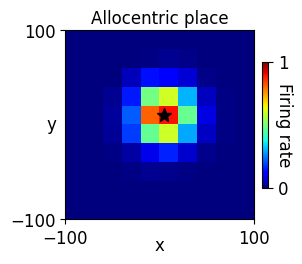

In [ ]:
# plot the two-dimensional firing-rate map of the place cell
plot_allocentric_place_tuning(place_tuning, place_cell_properties, analysis, plotting)

❓ **What do the different colors mean?**

❓ **What does the black star represent?**

Let's calculate a popular statistical metric, the spatial information content, for the simulated place cell and check whether it is significantly higher than expected by chance.

To estimate the spatial information content of a place cell, we can use a measure derived from information theory. The spatial information content can tell us how much information a particular cell's firing conveys about an animal's location within an environment. One commonly used formula to calculate this comes from Shannon's entropy. For a given place cell, the spatial information (SI) in bits per spike is given by:

$SI = \sum_{i=1}^{N} (p_i \cdot r_i) \log_2 \left(\frac{r_i}{r}\right)$

where:
- $N$ is the total number of spatial bins in the environment.
- $p_i$ is the probability of the animal being in bin \( i \), estimated as the fraction of time the animal spends in bin \( i \).
- $r_i$ is the firing rate of the cell in bin \( i \).
- $r$ is the overall mean firing rate of the cell (across all bins).

The product $p_i \cdot r_i$ is essentially the average firing rate in bin $i$ normalized by the time spent in that bin, and the term $\log_2(\frac{r_i}{r})$ scales this by the ratio of the local firing rate to the overall firing rate.

Here's a function for estimating the spatial information content.

In [ ]:
# function: calculate spatial information content per spike
def calculate_spatial_information_content(occupancy, place_tuning):
    """
    Calculate the spatial information content per spike of a place cell.

    Parameters:
    - occupancy: numpy array of occupancy probabilities for each spatial bin (sums to 1).
    - place_tuning: numpy array of the firing rate of the cell in each spatial bin.

    Returns:
    - spatial_info: the spatial information content in bits per spike.
    """

    # Ensure no zero firing rate to avoid division by zero in log
    place_tuning = np.where(place_tuning == 0, np.finfo(float).eps, place_tuning)

    # Mean firing rate across all bins
    mean_rate = np.sum(occupancy * place_tuning)

    # Information content calculation
    information_content = occupancy * place_tuning * np.log2(place_tuning / mean_rate)
    spatial_info = np.nansum(information_content)  # Use nansum to ignore NaNs from zeros in occupancy or firing_rates

    return spatial_info

Let's use this function to estimate the cell's spatial information content.

In [ ]:
# calculate the spatial information content for this place cell
spatial_info = calculate_spatial_information_content(occupancy, place_tuning)

Here, we simulated this cell as a place cell, so we can be 100% sure that it is really a place cell.

However, if we didn't know the ground truth, we would need a method for testing whether the spatial inforamtion content of this cell was indeed significantly high. This can be done, for example, by comparing the empirical spatial information content against surrogate spatial information content values.

These surrogate values can be created by shifting the firing rates relative to the behavioral data. In this way, we can create many surrogate spatial information content values (let's say 100 or 1000). If the empirical spatial inforamtion content value is then higher than the 95th percentile of surrogate values, we typically reject the null hypothesis that the cell is not a place cell.

Let's create 100 surrogate spatial information content values by doing exactly the same steps as above.

In [ ]:
# to know whether the cell encodes a significant amount of spatial inforamtion, compare against surrogates
n_surrogates = 100
surro_spatial_info = np.full(n_surrogates, np.nan)
for i_surro in range(n_surrogates):

    # random shift
    random_shift = np.random.randint(1, high = beh_neural.shape[0], size = 1, dtype = int)

    # create surrogate data by circularly shifting the firing rates relative to the behavioral data
    surro_beh_neural = beh_neural.copy()
    surro_beh_neural.firing_rate = np.roll(surro_beh_neural.firing_rate, random_shift)

    # calculate place tuning for this surrogate data
    surro_place_tuning, surro_occupancy = calculate_allocentric_place_tuning(analysis, surro_beh_neural)

    # calculate spatial information content for this surrogate data
    surro_spatial_info[i_surro] = calculate_spatial_information_content(surro_occupancy, surro_place_tuning)

Perfect! Let's compare the empirical value against the surrogate values.

In [ ]:
# now compare the spatial information content of the place cell against the surrogate spatial information contents
rank = np.sum(spatial_info > surro_spatial_info) / np.sum(~np.isnan(surro_spatial_info))
p_value = 1 - rank

# report
print('Is the simulated place cell a place cell according to its spatial information content? p = ' + str(p_value))

Is the simulated place cell a place cell according to its spatial information content? p = 0.0


❓ **How would you interpret these results?**

# **You've reached the end of the tutorial!**

If you're interested in learning more, check out the next section.


## **Further Reading**

#### Documentations of the imported libraries
* [Numpy](https://numpy.org/doc/stable/)
* [Pandas](https://pandas.pydata.org/docs/)
* [Matplotlib](https://matplotlib.org/stable/contents.html)
* [Scipy](https://docs.scipy.org/doc/scipy/)


#### Tutorials for using pyplot, pandas, and numpy
* [Pyplot Tutorial](https://matplotlib.org/stable/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py)
* [10 minutes to Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)
* [Numpy quickstart](https://numpy.org/doc/stable/user/quickstart.html)

#### Place-cell papers
* [Original report](https://www.sciencedirect.com/science/article/pii/0006899371903581?via%3Dihub)
* [Place cells and Alzheimer's disease](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2396558/)
* [Place cells in humans](https://www.nature.com/articles/s41593-023-01550-x)
* [Causal relevance of place cells](https://www.nature.com/articles/nn.4653)